In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [129]:
df = pd.read_csv('train.csv')


In [130]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [131]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [132]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [133]:
df = df.dropna(axis=1)

<AxesSubplot:>

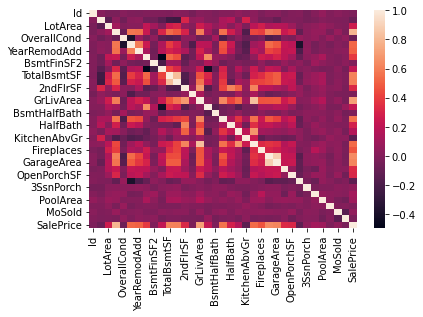

In [134]:
corr = df.corr()
sns.heatmap(corr)

In [135]:
#sns.pairplot(df, hue = 'SalePrice')

In [136]:
X = df[['OverallQual','OverallCond']]
y = df['SalePrice']

In [137]:
X.shape

(1460, 2)

In [138]:
y.shape

(1460,)

In [139]:
reg = LinearRegression().fit(X, y)

In [140]:
reg.coef_

array([45408.43267524,  -370.00654346])

In [141]:
reg.score(X, y)

0.6256785279481476

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [143]:
prediction = reg.predict(X_test)


In [144]:
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, prediction))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction))

Coefficients: 
 [45408.43267524  -370.00654346]
Mean squared error: 2543331555.28
Coefficient of determination: 0.63


In [145]:
from sklearn.linear_model import Ridge

In [146]:
reg = Ridge(alpha = 1)

In [147]:
reg.fit(X_train, y_train)

Ridge(alpha=1)

In [148]:
Ridge()

Ridge()

In [149]:
reg.coef_

array([44063.22459207,   118.10352172])

In [150]:
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, prediction))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction))

Coefficients: 
 [44063.22459207   118.10352172]
Mean squared error: 2543331555.28
Coefficient of determination: 0.63


In [151]:
X = df[['LotArea', 'YearBuilt', 'YearRemodAdd']]
y = df['SalePrice']

In [152]:
X.shape

(1460, 3)

In [153]:
y.shape

(1460,)

In [154]:
reg = LinearRegression().fit(X, y)

In [155]:
reg.coef_

array([   2.02830939,  895.19052046, 1161.37176506])

In [156]:
reg.score(X, y)

0.39825091432058835

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [158]:
prediction = reg.predict(X_test)


In [159]:
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, prediction))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction))

Coefficients: 
 [   2.02830939  895.19052046 1161.37176506]
Mean squared error: 4091472126.75
Coefficient of determination: 0.41
